In [2]:
%matplotlib inline


# Class Averaging

We demonstrate class averaging using the rotationally invariant representation algorithm.


In [3]:
import logging

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as PILImage

from aspire.classification import RIRClass2D, TopClassSelector
from aspire.image import Image
from aspire.noise import WhiteNoiseAdder
from aspire.source import ArrayImageSource  # Helpful hint if you want to BYO array.
from aspire.utils import gaussian_2d
from aspire.basis import FSPCABasis, SteerableBasis2D

logger = logging.getLogger(__name__)

## Build Simulated Data



### Circular 2D Gaussian Image



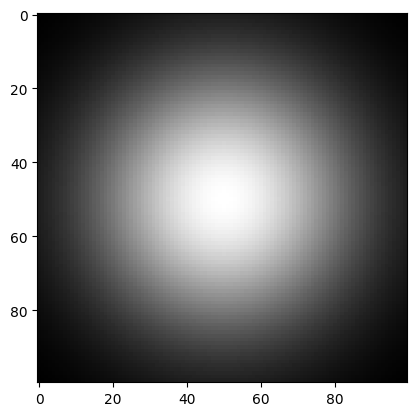

In [ ]:
L = 100
round_disc = gaussian_2d(L, sigma=L / 4)
plt.imshow(round_disc, cmap="gray")
plt.show()

### Oval 2D Gaussian Image



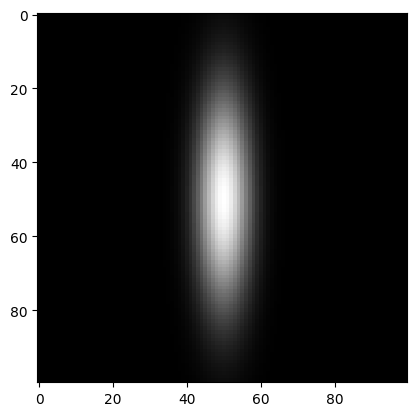

In [ ]:
oval_disc = gaussian_2d(L, sigma=(L / 20, L / 5))
plt.imshow(oval_disc, cmap="gray")
plt.show()

### Handed Image

Create richer test set by including an asymmetric image.



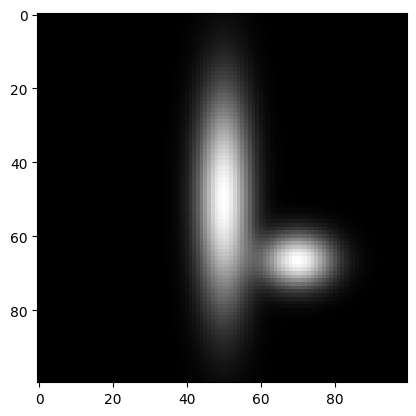

In [ ]:
# Create a second oval.
oval_disc2 = gaussian_2d(L, mu=(L / 5, L / 6), sigma=(L / 15, L / 20))

# Strategically add it to `oval_disc`.
yoval_discL = oval_disc.copy()
yoval_discL += oval_disc2
plt.imshow(yoval_discL, cmap="gray")
plt.show()

### Reflected Image

Also include the reflection of  the asymmetric image.



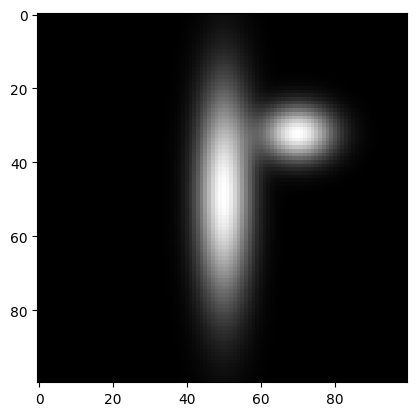

In [ ]:
yoval_discR = np.flipud(yoval_discL)
plt.imshow(yoval_discR, cmap="gray")
plt.show()

### Example Data Set Source

We concatenate and shuffle 512 rotations of the Gaussian images above to create our data set.



2023-02-19 16:40:43,369 INFO [aspire.source.image] Attempting to create an Image object from Numpy array.
2023-02-19 16:40:43,371 INFO [aspire.source.image] Creating ArrayImageSource with 1440 images.


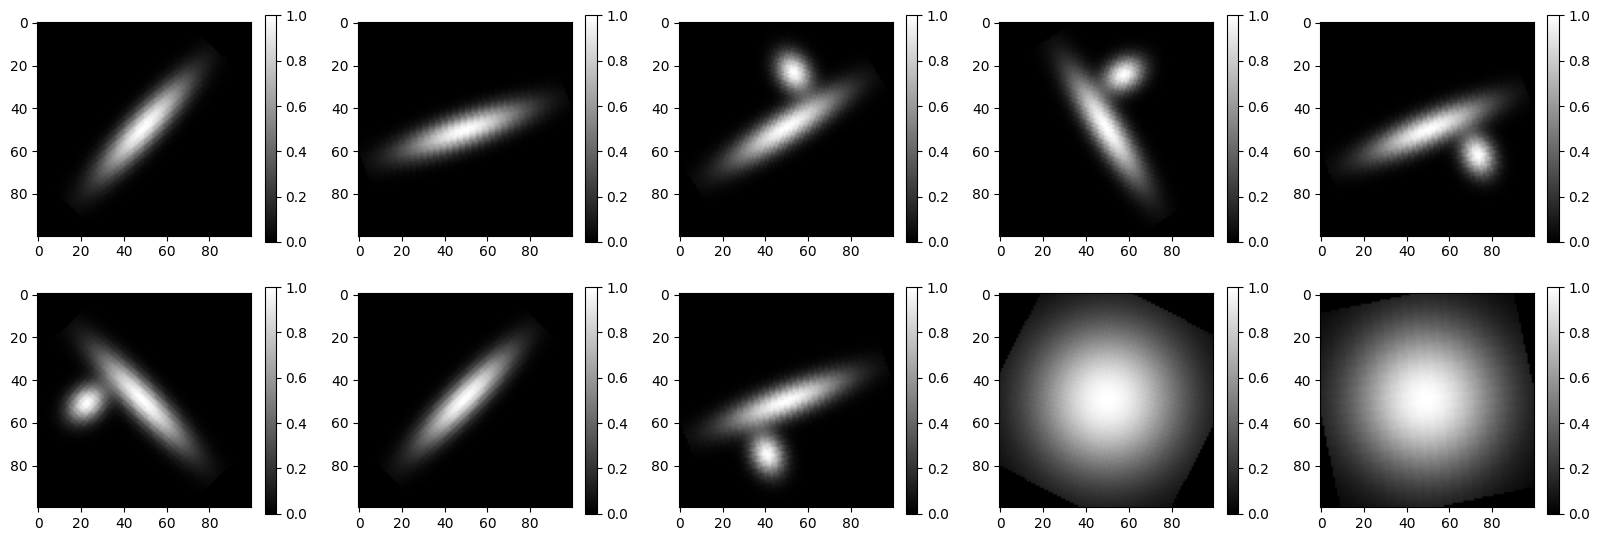

In [ ]:
# How many entries (angles) in our stack
N = 360
thetas = np.linspace(start=0, stop=360, num=N, endpoint=False)

classRound = np.zeros((N, L, L))
classOval = np.zeros((N, L, L))
classYOvalL = np.zeros((N, L, L))
classYOvalR = np.zeros((N, L, L))

for i, theta in enumerate(thetas):
    classRound[i] = np.asarray(PILImage.fromarray(round_disc).rotate(theta))
    classOval[i] = np.asarray(PILImage.fromarray(oval_disc).rotate(theta))
    classYOvalL[i] = np.asarray(PILImage.fromarray(yoval_discL).rotate(theta))
    classYOvalR[i] = np.asarray(PILImage.fromarray(yoval_discR).rotate(theta))

# We'll make an example data set by concatentating then shuffling these.
example_array = np.concatenate((classRound, classOval, classYOvalL, classYOvalR))
np.random.seed(1234567)
np.random.shuffle(example_array)

# So now that we have cooked up an example dataset, lets create an ASPIRE source
src = ArrayImageSource(example_array)

# Let's peek at the images to make sure they're shuffled up nicely
src.images[:10].show()

## Build Simulated Data



### Circular 2D Gaussian Image



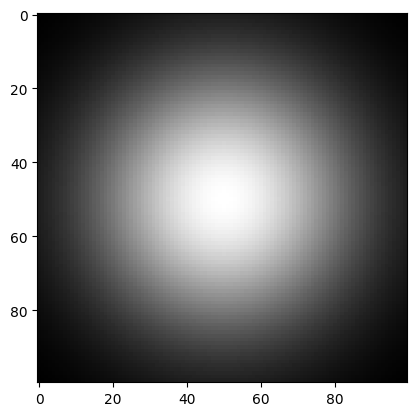

In [4]:
L = 100
round_disc = gaussian_2d(L, sigma=L / 4)
plt.imshow(round_disc, cmap="gray")
plt.show()

### Oval 2D Gaussian Image



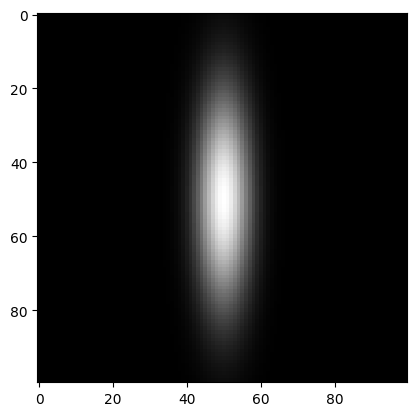

In [5]:
oval_disc = gaussian_2d(L, sigma=(L / 20, L / 5))
plt.imshow(oval_disc, cmap="gray")
plt.show()

### Handed Image

Create richer test set by including an asymmetric image.



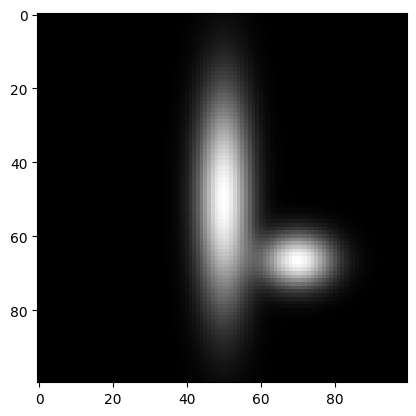

In [6]:
# Create a second oval.
oval_disc2 = gaussian_2d(L, mu=(L / 5, L / 6), sigma=(L / 15, L / 20))

# Strategically add it to `oval_disc`.
yoval_discL = oval_disc.copy()
yoval_discL += oval_disc2
plt.imshow(yoval_discL, cmap="gray")
plt.show()

### Reflected Image

Also include the reflection of  the asymmetric image.



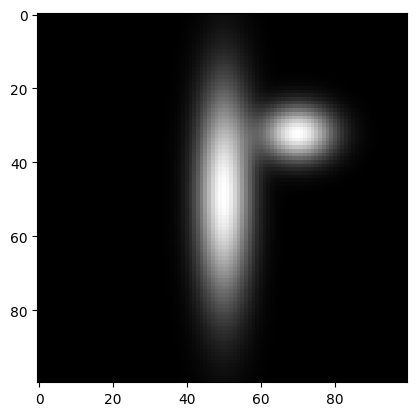

In [7]:
yoval_discR = np.flipud(yoval_discL)
plt.imshow(yoval_discR, cmap="gray")
plt.show()

### Example Data Set Source

We concatenate and shuffle 512 rotations of the Gaussian images above to create our data set.



2023-02-19 16:40:43,369 INFO [aspire.source.image] Attempting to create an Image object from Numpy array.
2023-02-19 16:40:43,371 INFO [aspire.source.image] Creating ArrayImageSource with 1440 images.


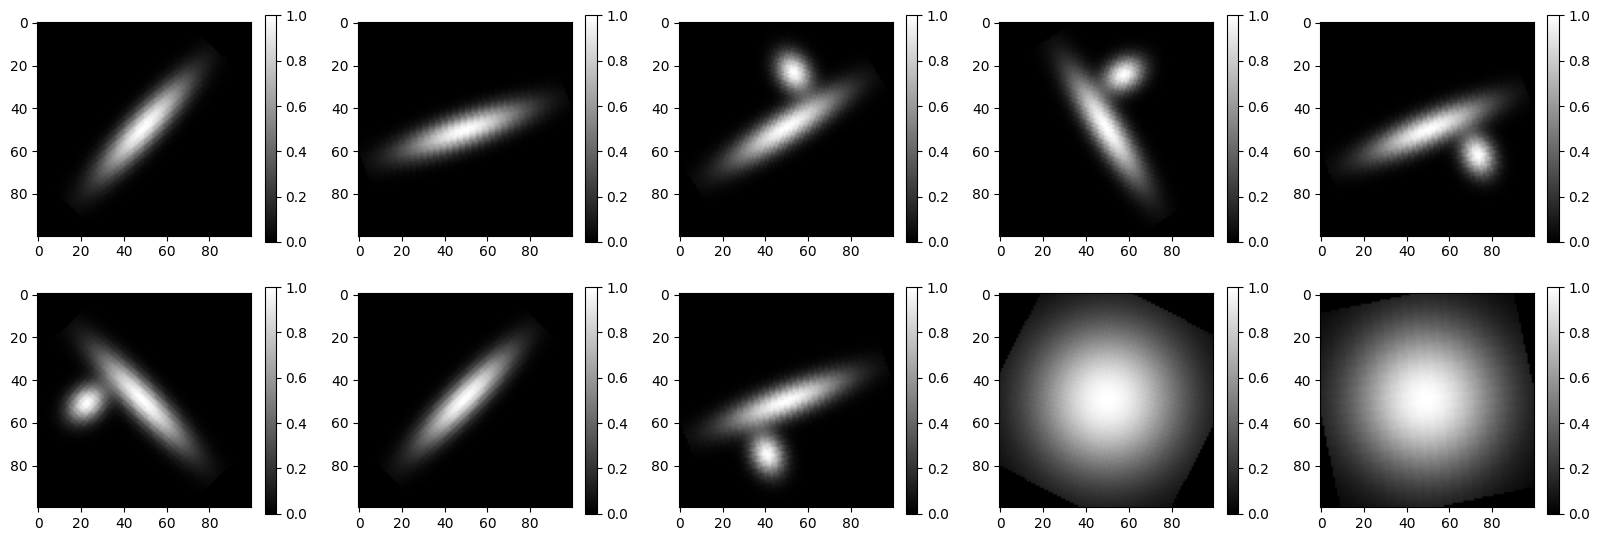

In [ ]:
# How many entries (angles) in our stack
N = 360
thetas = np.linspace(start=0, stop=360, num=N, endpoint=False)

classRound = np.zeros((N, L, L))
classOval = np.zeros((N, L, L))
classYOvalL = np.zeros((N, L, L))
classYOvalR = np.zeros((N, L, L))

for i, theta in enumerate(thetas):
    classRound[i] = np.asarray(PILImage.fromarray(round_disc).rotate(theta))
    classOval[i] = np.asarray(PILImage.fromarray(oval_disc).rotate(theta))
    classYOvalL[i] = np.asarray(PILImage.fromarray(yoval_discL).rotate(theta))
    classYOvalR[i] = np.asarray(PILImage.fromarray(yoval_discR).rotate(theta))

# We'll make an example data set by concatentating then shuffling these.
example_array = np.concatenate((classRound, classOval, classYOvalL, classYOvalR))
np.random.seed(1234567)
np.random.shuffle(example_array)

# So now that we have cooked up an example dataset, lets create an ASPIRE source
src = ArrayImageSource(example_array)

# Let's peek at the images to make sure they're shuffled up nicely
src.images[:10].show()

## Mini Tests

In [ ]:
import logging

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as PILImage

from aspire.classification import RIRClass2D, TopClassSelector
from aspire.image import Image
from aspire.noise import WhiteNoiseAdder
from aspire.source import ArrayImageSource  # Helpful hint if you want to BYO array.
from aspire.utils import gaussian_2d
from aspire.basis import FSPCABasis, SteerableBasis2D

logger = logging.getLogger(__name__)
L = 100
round_disc = gaussian_2d(L, sigma=L / 4)
oval_disc = gaussian_2d(L, sigma=(L / 20, L / 5))
# Create a second oval.
oval_disc2 = gaussian_2d(L, mu=(L / 5, L / 6), sigma=(L / 15, L / 20))

# Strategically add it to `oval_disc`.
yoval_discL = oval_disc.copy()
yoval_discL += oval_disc2
yoval_discR = np.flipud(yoval_discL)
# How many entries (angles) in our stack
N = 60
thetas = np.linspace(start=0, stop=360, num=N, endpoint=False)

classRound = np.zeros((N, L, L))
classOval = np.zeros((N, L, L))
classYOvalL = np.zeros((N, L, L))
classYOvalR = np.zeros((N, L, L))

for i, theta in enumerate(thetas):
    classRound[i] = np.asarray(PILImage.fromarray(round_disc).rotate(theta))
    classOval[i] = np.asarray(PILImage.fromarray(oval_disc).rotate(theta))
    classYOvalL[i] = np.asarray(PILImage.fromarray(yoval_discL).rotate(theta))
    classYOvalR[i] = np.asarray(PILImage.fromarray(yoval_discR).rotate(theta))

# We'll make an example data set by concatentating then shuffling these.
example_array = np.concatenate((classRound, classOval, classYOvalL, classYOvalR))
np.random.seed(1234567)
np.random.shuffle(example_array)

# So now that we have cooked up an example dataset, lets create an ASPIRE source
src = ArrayImageSource(example_array)

2023-02-20 17:38:46,877 INFO [aspire.source.image] Attempting to create an Image object from Numpy array.
2023-02-20 17:38:46,879 INFO [aspire.source.image] Creating ArrayImageSource with 240 images.


In [ ]:
import logging
logger = logging.getLogger()
logger.disabled = True

basis = FSPCABasis(src, components=400, batch_size=512)

2023-02-19 16:40:03,482 INFO [aspire.basis.ffb_2d] Expanding 2D image in a frequency-domain Fourier–Bessel basis using the fast method.
2023-02-19 16:40:04,895 INFO [aspire.basis.fspca] Estimating the noise of images.
2023-02-19 16:40:04,896 INFO [aspire.noise.noise] Determining Noise variance in batches of 512


100%|██████████| 3/3 [00:00<00:00, 12.55it/s]

2023-02-19 16:40:05,143 INFO [aspire.noise.noise] Noise variance = 0.0011702210469851822
2023-02-19 16:40:05,146 INFO [aspire.basis.fspca] Setting noise_var=0.0011702210469851822
2023-02-19 16:40:05,150 INFO [aspire.covariance.covar2d] Represent CTF filters in FB basis


KeyboardInterrupt: 

: 

In [ ]:
fspca_coef = basis.spca_coef
complex_coef = basis.to_complex(fspca_coef)

In [ ]:
coef_shape = np.shape(complex_coef)
orig_coef_shape = np.shape(fspca_coef)
num_images = coef_shape[0]
num_coef = coef_shape[1]

num_coef

template_bank = basis.generate_random_templates(8*num_images)

In [ ]:
np.shape(template_bank)

single = template_bank[0]
imm = complex_coef[0]

np.shape(single)

basis.max_filter_companion(single,imm)

-0.4660923744243031

In [ ]:
# testing max filtering - phase retrival
from aspire.basis import SteerableBasis2D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline    


b = SteerableBasis2D([10,10])
z = np.array([1,3j], dtype=complex)
w = np.array([1,1], dtype=complex)
b.k_max = 4
b.fixed_angular_indices = {}
b.fixed_angular_indices[2] = [0]
b.fixed_angular_indices[4] = [1]
maxval, args = b.max_filter_companion(z,w)


[ 1.-0.j          0.+0.j         -0.-0.16666667j  0.+0.j
  0.+0.j          0.+0.j         -0.+0.16666667j  0.+0.j        ]
[-1.14676529 -0.42403104 -1.93566015  0.36486383 -2.77672883  1.2059325
  2.71756161  1.99482737]


3.72677996249965

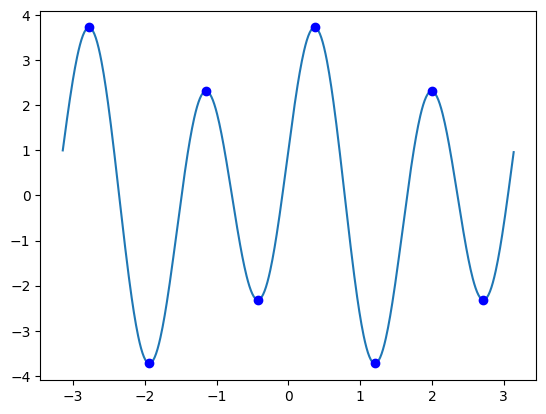

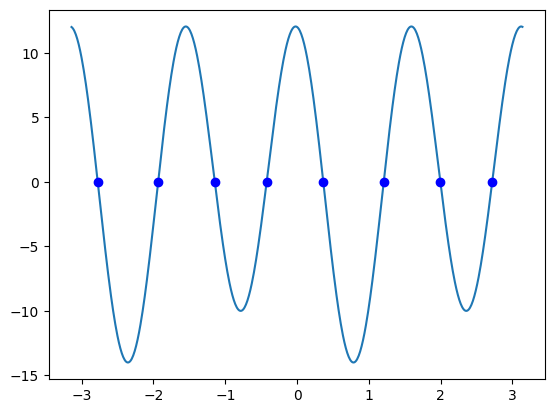

In [ ]:
x = np.arange(-np.pi,np.pi,0.01)   # start,stop,step
y = np.real( np.exp(1j*2*x) - 3*1j*np.exp(1j*4*x) )
der = np.real(1j*2*np.exp(1j*2*x) - 1j*4*3*1j*np.exp(1j*4*x))
derargs = np.real(1j*2*np.exp(1j*2*args) - 1j*4*3*1j*np.exp(1j*4*args))
points = np.real( np.exp(1j*2*args) - 3*1j*np.exp(1j*4*args) )
plt.plot(x,y)
plt.plot(args, points, 'bo')
plt.show()
plt.plot(x,der)
plt.plot(args,derargs,'bo')
plt.show()

In [ ]:
from scipy.optimize import minimize_scalar

def temp_fn(x):
    return -np.real( np.exp(1j*2*x) - 3*1j*np.exp(1j*4*x) )

res = minimize_scalar(temp_fn, method='bounded', bounds=(0, 2*np.pi))
-res.fun

3.72677996249039

## Max Filter Classifier Test

In [ ]:
import logging

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as PILImage

from aspire.classification import RIRClass2D, TopClassSelector
from aspire.image import Image
from aspire.noise import WhiteNoiseAdder
from aspire.source import ArrayImageSource  # Helpful hint if you want to BYO array.
from aspire.utils import gaussian_2d
from aspire.basis import FSPCABasis, SteerableBasis2D

logger = logging.getLogger(__name__)
L = 100
round_disc = gaussian_2d(L, sigma=L / 4)
oval_disc = gaussian_2d(L, sigma=(L / 20, L / 5))
# Create a second oval.
oval_disc2 = gaussian_2d(L, mu=(L / 5, L / 6), sigma=(L / 15, L / 20))

# Strategically add it to `oval_disc`.
yoval_discL = oval_disc.copy()
yoval_discL += oval_disc2
yoval_discR = np.flipud(yoval_discL)
# How many entries (angles) in our stack
N = 60
thetas = np.linspace(start=0, stop=360, num=N, endpoint=False)

classRound = np.zeros((N, L, L))
classOval = np.zeros((N, L, L))
classYOvalL = np.zeros((N, L, L))
classYOvalR = np.zeros((N, L, L))

for i, theta in enumerate(thetas):
    classRound[i] = np.asarray(PILImage.fromarray(round_disc).rotate(theta))
    classOval[i] = np.asarray(PILImage.fromarray(oval_disc).rotate(theta))
    classYOvalL[i] = np.asarray(PILImage.fromarray(yoval_discL).rotate(theta))
    classYOvalR[i] = np.asarray(PILImage.fromarray(yoval_discR).rotate(theta))

# We'll make an example data set by concatentating then shuffling these.
example_array = np.concatenate((classRound, classOval, classYOvalL, classYOvalR))
np.random.seed(1234567)
np.random.shuffle(example_array)

# So now that we have cooked up an example dataset, lets create an ASPIRE source
src = ArrayImageSource(example_array)

2023-02-20 17:38:46,877 INFO [aspire.source.image] Attempting to create an Image object from Numpy array.
2023-02-20 17:38:46,879 INFO [aspire.source.image] Creating ArrayImageSource with 240 images.


In [ ]:
rir = RIRClass2D(
    src,
    fspca_components=400,
    bispectrum_components=2,  # Compressed Features after last PCA stage.
    n_nbor=10,
    n_classes=10,
    large_pca_implementation="legacy",
    nn_implementation="sklearn",
    bispectrum_implementation="legacy",
    max_filter = True,
    max_filter_method = "scipy",
    num_templates = 50,
    num_procs=1,  # Change to "auto" if your machine has many processors
)

classesmax, reflmax, distancesmax = rir.classify()

2023-02-20 17:40:19,062 INFO [aspire.basis.ffb_2d] Expanding 2D image in a frequency-domain Fourier–Bessel basis using the fast method.
2023-02-20 17:40:20,586 INFO [aspire.basis.fspca] Estimating the noise of images.
2023-02-20 17:40:20,588 INFO [aspire.noise.noise] Determining Noise variance in batches of 512


100%|██████████| 1/1 [00:00<00:00, 23.57it/s]

2023-02-20 17:40:20,638 INFO [aspire.noise.noise] Noise variance = 0.0011720735853221233
2023-02-20 17:40:20,641 INFO [aspire.basis.fspca] Setting noise_var=0.0011720735853221233
2023-02-20 17:40:20,643 INFO [aspire.covariance.covar2d] Represent CTF filters in FB basis


2023-02-20 17:40:24,817 WARNING [aspire.covariance.covar2d] Left side b after removing noise in Batched Cov2D is not positive semidefinite.
2023-02-20 17:40:24,974 WARNING [aspire.covariance.covar2d] Covariance matrix in Batched Cov2D is not positive semidefinite.
2023-02-20 17:40:24,977 INFO [aspire.covariance.covar2d] Convert matrices to positive semidefinite.


100%|██████████| 240/240 [00:36<00:00,  6.59it/s]

2023-02-20 17:41:03,485 INFO [aspire.classification.rir_class2d] Calculate Nearest Neighbors using sklearn.


In [ ]:
rir = RIRClass2D(
    src,
    fspca_components=400,
    bispectrum_components=10,  # Compressed Features after last PCA stage.
    n_nbor=10,
    n_classes=10,
    large_pca_implementation="legacy",
    nn_implementation="legacy",
    bispectrum_implementation="legacy",
    max_filter = False,
    num_procs=1,  # Change to "auto" if your machine has many processors
)

#classes, dists = rir.classify()
classesbi, refl, distancesbi = rir.classify()

NameError: name 'RIRClass2D' is not defined

In [ ]:
avgsbi = rir.averages(classesbi, refl, distancesbi)

2023-02-20 07:21:58,299 INFO [aspire.classification.rir_class2d] Select 10 Classes from Nearest Neighbors
2023-02-20 07:21:58,303 INFO [aspire.classification.rir_class2d] Begin Averaging of 10 Classes using <aspire.classification.averager2d.BFSReddyChatterjiAverager2D object at 0x7f0de9e800d0>.


100%|██████████| 10/10 [00:00<00:00, 17.76it/s]


2023-02-20 07:26:51,060 INFO [aspire.source.image] Creating ArrayImageSource with 10 images.


In [ ]:
avgsmax = rir.averages(classesmax, reflmax, distancesmax)

2023-02-20 16:23:02,173 INFO [aspire.classification.rir_class2d] Select 10 Classes from Nearest Neighbors
2023-02-20 16:23:02,177 INFO [aspire.classification.rir_class2d] Begin Averaging of 10 Classes using <aspire.classification.averager2d.BFSReddyChatterjiAverager2D object at 0x7f0db500fca0>.


100%|██████████| 10/10 [00:01<00:00,  5.07it/s]

2023-02-20 16:29:52,910 INFO [aspire.source.image] Creating ArrayImageSource with 10 images.


### Display Classes



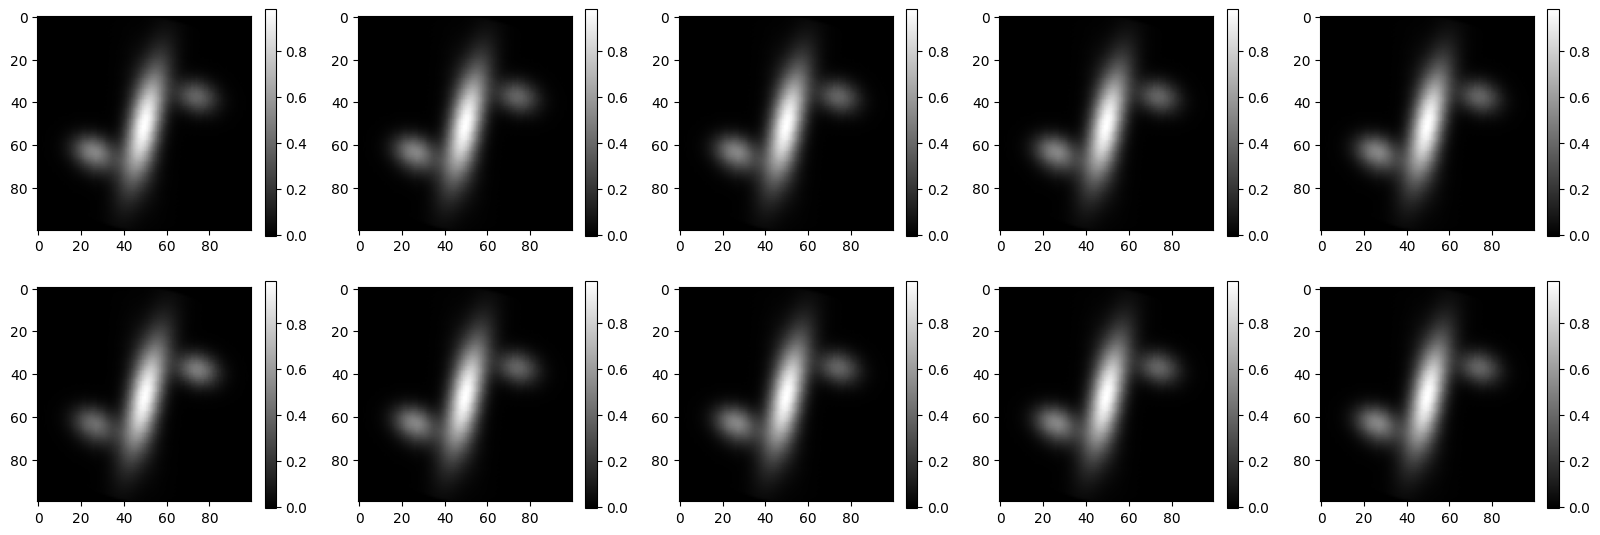

In [ ]:
avgsmax.images[:10].show()

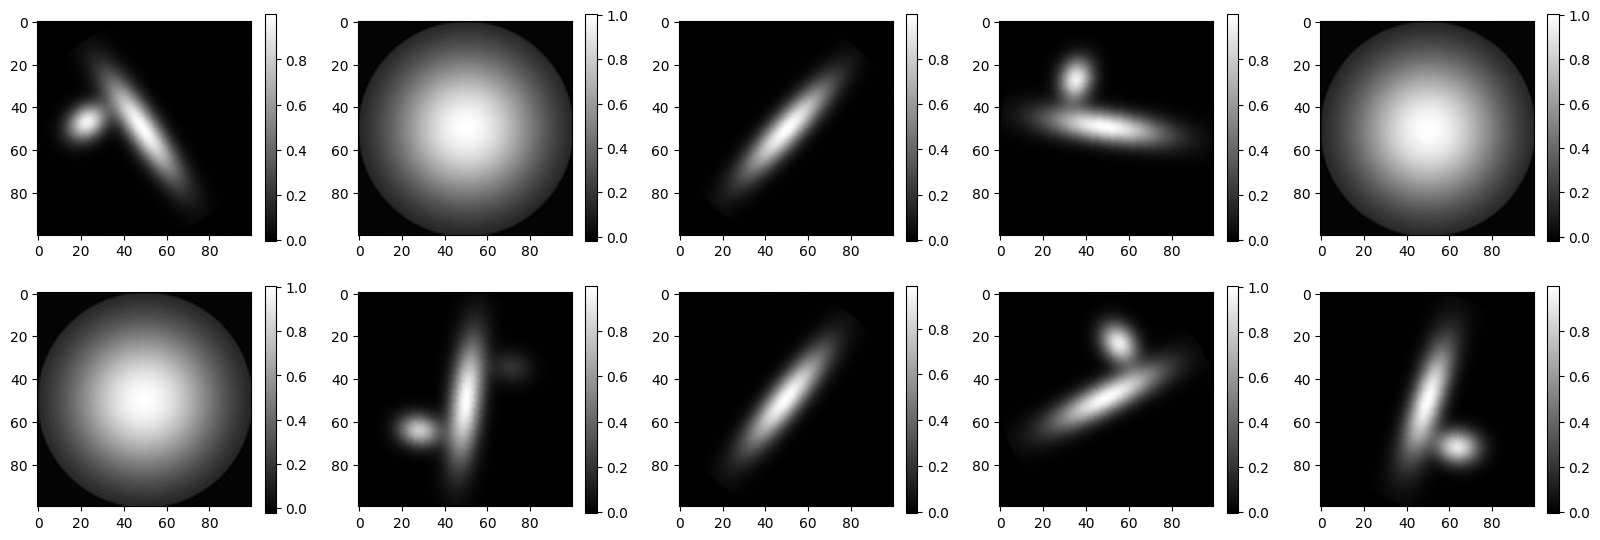

In [ ]:
avgsbi.images[:10].show()

## Class Averaging with Noise



### Add Noise to Data Set



2023-02-17 16:49:08,976 INFO [aspire.source.image] Creating ArrayImageSource with 2048 images.


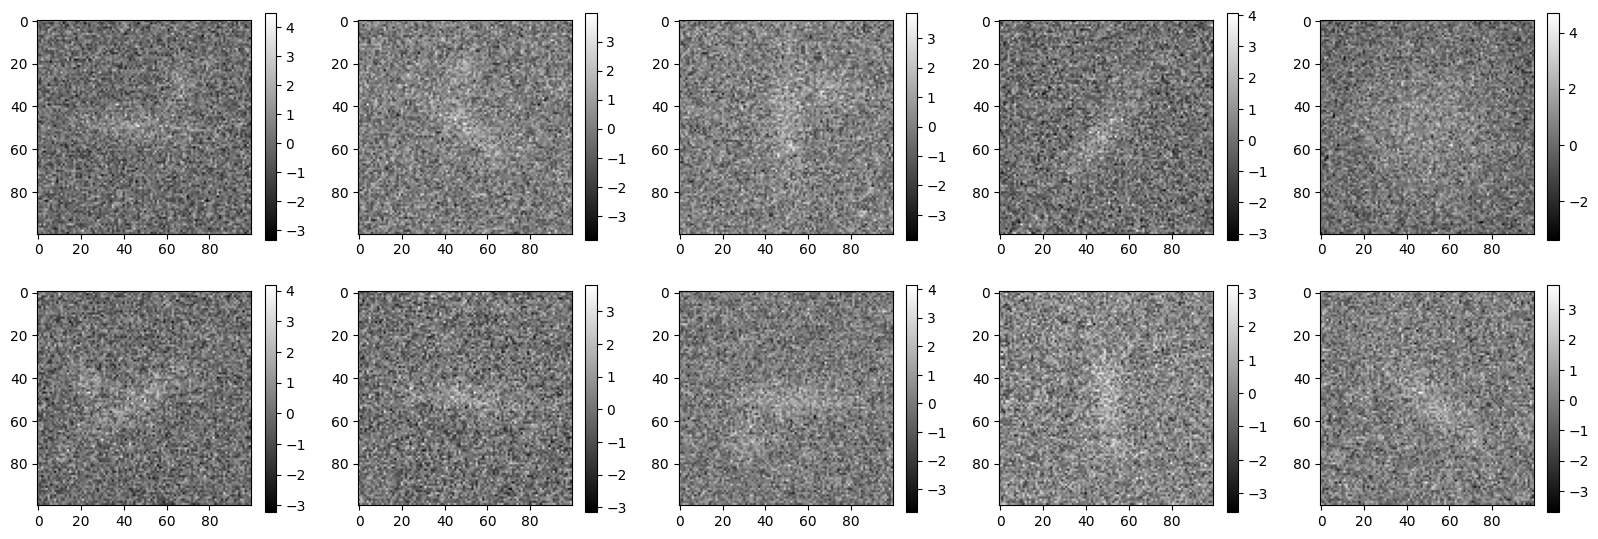

In [16]:
# Using the sample variance, we'll compute a target noise variance
# Noise
var = np.var(src.images[:].asnumpy())
noise_var = var * 2**4

# Then create noise with the ``WhiteNoiseAdder`` class.
noise = WhiteNoiseAdder(var=noise_var, seed=123)

# Add noise to the images by performing ``forward``
noisy_im = noise.forward(src.images[:])

# Recast as an ASPIRE source
noisy_src = ArrayImageSource(noisy_im)

# Let's peek at the noisey images
noisy_src.images[:10].show()

### RIR with Noise
This also demonstrates changing the Nearest Neighbor search to using
scikit-learn, and using ``TopClassSelector``.``TopClassSelector``
will deterministically select the first ``n_classes``.  This is useful
for development and debugging.  By default ``RIRClass2D`` uses a
``RandomClassSelector``.



In [ ]:
noisy_rir = RIRClass2D(
    noisy_src,
    fspca_components=400,
    bispectrum_components=300,
    n_nbor=10,
    n_classes=10,
    selector=TopClassSelector(),
    large_pca_implementation="legacy",
    nn_implementation="sklearn",
    bispectrum_implementation="legacy",
    num_procs=1,  # Change to "auto" if your machine has many processors
)

classes, reflections, dists = noisy_rir.classify()
avgs = noisy_rir.averages(classes, reflections, dists)

### Display Classes



In [ ]:
avgs.images[:10].show()

## Review a class

Select a class to review.



In [ ]:
review_class = 5

# Display the original image.
noisy_src.images[review_class].show()

# Report the identified neighbor indices
logger.info(f"Class {review_class}'s neighors: {classes[review_class]}")

# Report the identified neighbors
Image(noisy_src.images[:][classes[review_class]]).show()

# Display the averaged result
avgs.images[review_class].show()

## Alignment Details

Alignment details are exposed when avaialable from an underlying ``averager``.
In this case, we'll get the estimated alignments for the ``review_class``.
These alignment arrays are indexed the same as ``classes``,
having shape (n_classes, n_nbor).



In [ ]:
est_rotations = noisy_rir.averager.rotations[review_class]
est_shifts = noisy_rir.averager.shifts[review_class]
est_correlations = noisy_rir.averager.correlations[review_class]

logger.info(f"Estimated Rotations: {est_rotations}")
logger.info(f"Estimated Shifts: {est_shifts}")
logger.info(f"Estimated Correlations: {est_correlations}")

# Compare the original unaligned images with the estimated alignment.
# Get the indices from the classification results.
nbr = 3
original_img_0_idx = classes[review_class][0]
original_img_nbr_idx = classes[review_class][nbr]

# Lookup the images.
original_img_0 = noisy_src.images[original_img_0_idx].asnumpy()[0]
original_img_nbr = noisy_src.images[original_img_nbr_idx].asnumpy()[0]

# Rotate using estimated rotations.
angle = est_rotations[nbr] * 180 / np.pi
if reflections[review_class][nbr]:
    original_img_nbr = np.flipud(original_img_nbr)
rotated_img_nbr = np.asarray(PILImage.fromarray(original_img_nbr).rotate(angle))

plt.subplot(2, 2, 1)
plt.title("Original Images")
plt.imshow(original_img_0)
plt.xlabel("Img 0")
plt.subplot(2, 2, 2)
plt.imshow(original_img_nbr)
plt.xlabel(f"Img {nbr}")

plt.subplot(2, 2, 3)
plt.title("Est Rotation Applied")
plt.imshow(original_img_0)
plt.xlabel("Img 0")
plt.subplot(2, 2, 4)
plt.imshow(rotated_img_nbr)
plt.xlabel(f"Img {nbr} rotated {angle:.4}*")
plt.tight_layout()
plt.show()